### PDAN8412 FINAL POE: IMAGE CLASSIFICATION WITH TENSORFLOW

**Image Classification**<br>
Image classification, as defined by SAS Community (2023), is a foundational technique in computer vision, involving machines identifying and categorising objects within images through pattern recognition, as it relies on learning from labelled datasets to predict the class of unseen images. Image classification is usually done with Convolutional Neural Networks (CNNs), which are specialised neural network architectures widely employed for image-related tasks, including the construction of image classification models.<br>
Two primary methods for image classification are Supervised and Unsupervised Machine Learning Algorithms. In unsupervised classification, the process is automated and does not require training data. Image characteristics are detected using algorithms during image processing, with common methods including image clustering and pattern recognition. Supervised classification, on the other hand, involves manual selection of training data, statistical measures, and probabilistic relationships to determine pixel labels.<br>
Shinozuka et. Al(2009) describes the process of image classification as  involving collection a labelled dataset, preprocessing the data by resizing and normalising images, selecting a suitable model architecture (such as Convolutional Neural Networks), training the model on a labelled dataset, evaluating its performance on a test dataset, and finally deploying the model for making predictions on new images.	<br>
**Reference List**<br>
Shinozuka, M., Mansouri, B., 2009. Synthetic aperture radar and remote sensing technologies for structural health monitoring of civil infrastructure systems. Science Direct, 113-151. [Online]. Available at: https://doi.org/10.1533/9781845696825.1.114	                   	              
[Accessed 20 November 2023].<br>

SAS Community. Introduction to Computer Vision: Image Classification Using Model Zoo,2023. [Online].Available at: https://communities.sas.com/t5/SAS-Communities-Library/Introduction-to-Computer-Vision-Image-Classification-Using-Model/ta-p/900921				             
[Accessed 20 November 2023]


**The Dataset**<br>
Data source: https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset <br>

This dataset from Kaggle, consists of 46470 images with a balanced distribution between male (23235) and female (23235) categories was selected for Gender Image Classification. Image classification aims to teach a machine learning model to recognise and categorise objects or scenes within images, and in this case, the goal is to classify images based on gender.The dataset's purpose aligns perfectly with this objective and therefore this dataset is particularly well-suited for image classification, specifically gender classification, given its focus on cropped images of males and females.<br>

The balanced distribution of images categories ensures that the model is exposed to an equal representation of both genders during training, preventing bias and ensuring the model's ability to generalise well to unseen data. Additionally, the inclusion of cropped images enhances the relevance of the dataset by focusing on the specific features that contribute to gender classification, potentially improving the model's accuracy and efficiency

**The Analysis**<br>
This image classification model is a type of supervised machine learning model, specifically designed for binary classification.The model is trained to predict the gender (male or female) based on images using TensorFlow's Keras and building a Convolutional Neural Network (CNN) in the following steps:

![](Flow1.PNG)
*process flow diagram (by Author)*

In [1]:
pip install spark

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Creating a Spark session
import spark
import pyspark
from pyspark.sql import SparkSession

spark=SparkSession.builder\
.appName("CNN Image Classification")\
.getOrCreate()

In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
#Importing the necessary libraries
import os
import cv2
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import display, Image

### 1. GETTING DATA

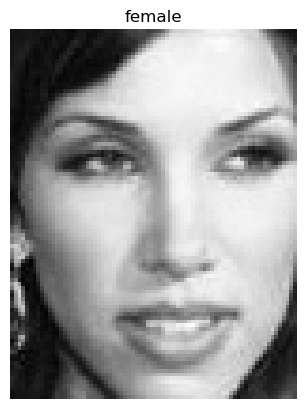

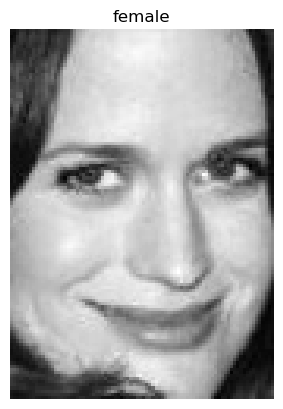

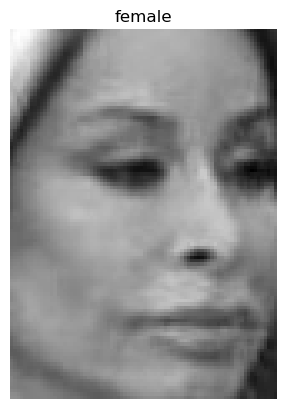

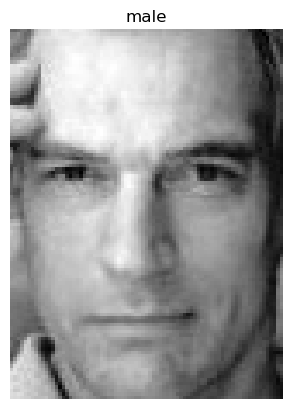

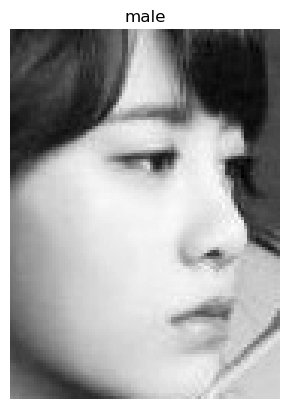

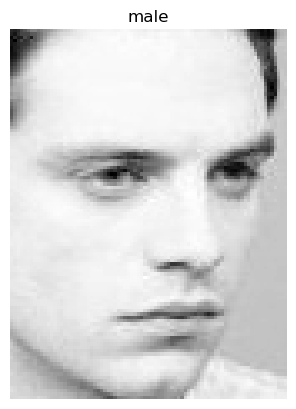

In [6]:
DATADIR = r'C:\Users\ldinisile\OneDrive - ADvTECH Ltd\Desktop\OneDrive - ADvTECH PTY LTD\PGD Data Analytics 2023\Programming\POE\data'
CATEGORIES = ['female', 'male']

# Limiting the number of images to display for each category
images_to_display = 3

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    display_count = 0

    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

        # Convert image array to float32
        img_array = img_array.astype('float32')
        
        #Displaying the images
        plt.imshow(img_array, cmap='gray')
        plt.title(category)
        plt.axis('off')
        plt.show()

        display_count += 1
        if display_count == images_to_display:
            break

In [7]:
print(img_array)

[[ 43.  37.  46. ... 169. 180. 182.]
 [ 35.  24.  51. ... 165. 178. 184.]
 [ 11.  49.  29. ... 172. 184. 190.]
 ...
 [219. 214. 208. ... 230. 227. 225.]
 [213. 212. 210. ... 234. 233. 232.]
 [211. 213. 214. ... 234. 233. 234.]]


In [8]:
print("Shape:", img_array.shape)
print("Data Type:", img_array.dtype)
print("Min Value:", cv2.minMaxLoc(img_array)[0])
print("Max Value:", cv2.minMaxLoc(img_array)[1])

Shape: (111, 83)
Data Type: float32
Min Value: 4.0
Max Value: 250.0


### 2. PREPROCESSING

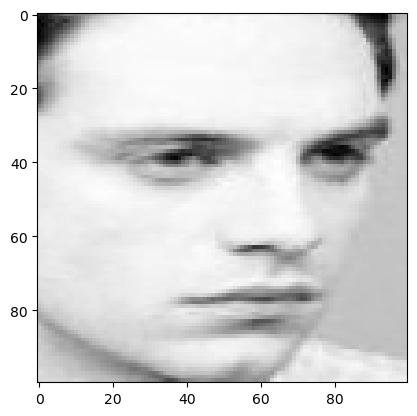

In [9]:
#Resizing the images to standardize all image sizes
IMG_SIZE=100

new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [10]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        print(f"Processing category: {category}, class_num: {class_num}")
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

Processing category: female, class_num: 0
Processing category: male, class_num: 1


In [11]:
#Showing the length of the training data(total number of records in the dataset)
print(len(training_data))

46470


In [12]:
# Extracting features (X) and labels (y) from training_data
X = np.array([features for features, _ in training_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array([label for _, label in training_data])

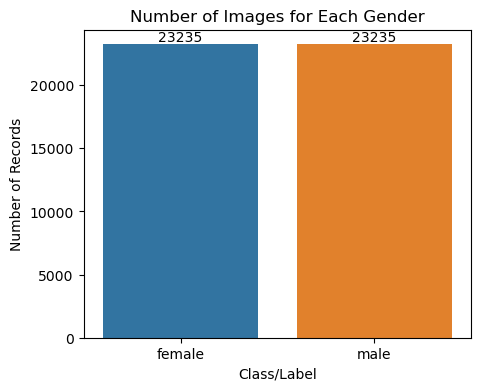

In [13]:
# Visualising the image counts per Gender using a bar plot

import seaborn as sns
class_counts = np.bincount(y)

plt.figure(figsize=(5, 4))
sns.barplot(x=np.arange(len(class_counts)), y=class_counts)
plt.xticks(np.arange(len(class_counts)), labels=CATEGORIES)
plt.xlabel('Class/Label')
plt.ylabel('Number of Records')
plt.title('Number of Images for Each Gender')
for i, count in enumerate(class_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [14]:
#Shuffling the arrangement in the training data so that the category labels appear randomly for the training,this is done to avoid overfiting the model learning all female data first and then all male data later.
import random

random.shuffle(training_data)

In [15]:
for sample in training_data:
    print(sample[1])

0
1
0
0
0
1
0
1
1
1
1
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
1
0
0
1
1
1
0
1
1
0
1
0
0
0
1
0
1
1
0
1
1
1
0
1
0
1
0
0
1
0
0
1
0
0
1
0
1
1
1
1
0
1
1
0
1
0
0
0
0
1
0
0
0
0
1
0
0
1
1
1
0
1
1
0
0
1
1
1
0
0
1
1
0
1
1
1
1
1
1
0
1
0
1
1
1
0
0
0
1
0
1
1
1
1
1
1
0
0
0
0
0
0
0
1
1
0
1
1
0
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
1
1
1
1
0
1
0
0
0
0
1
0
1
0
1
0
1
1
0
0
1
1
1
0
0
1
1
0
1
0
1
0
0
0
0
1
0
1
0
1
0
1
1
0
0
1
0
1
0
1
1
1
1
1
1
1
0
1
1
0
0
1
0
0
1
0
0
1
1
1
0
0
0
0
0
0
1
1
1
0
0
0
0
1
1
1
0
1
0
1
1
1
0
0
0
0
1
0
1
0
1
1
1
0
0
1
0
1
1
1
1
0
1
1
1
1
0
1
1
0
0
0
0
0
1
1
0
1
1
1
1
0
0
0
1
1
1
0
1
0
1
1
1
1
0
0
1
0
0
0
1
1
1
0
1
0
1
1
0
0
0
1
0
0
0
1
1
0
1
0
1
1
1
1
0
1
0
0
1
1
0
1
1
1
1
1
1
1
0
0
0
1
0
1
1
1
0
1
0
0
0
0
0
0
0
0
1
1
1
0
1
0
1
0
0
1
0
0
0
1
0
1
1
0
1
0
0
0
1
0
0
1
0
1
1
0
0
1
1
1
0
0
0
0
1
0
1
1
0
1
0
1
0
0
1
1
1
1
0
0
1
0
0
0
0
1
1
0
1
1
1
0
0
0
1
1
0
1
0
0
1
1
0
0
1
1
1
1
0
1
0
1
0
1
0
1
0
0
0
0
0
1
0
0
1
1
1
0
1
0
0
0
1
1
1
0
1
0
0
0
1
0
0
0
1
0
1
0
1
0
0
0
0


In [16]:
#Saving my preprocessed data
import pickle

pickle_out=open('X.pickle','wb')
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

In [17]:
pickle_in=open('X.pickle','rb')
X=pickle.load(pickle_in)

### 3. BUILDING THE MODEL
In this section, a CNN model that will classify images as either male or female will be built using a TENSORFLOW PIPELINE.<br>
The basic structure for my CNN model consists of the following Layers:<br>
![](Model1.PNG)



In [18]:
#MODEL PIPELINE

#Libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.layers import MaxPooling2D
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Splitting the data into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converting labels to categorical data
from tensorflow.keras.utils import to_categorical
y= to_categorical(y, num_classes=2)

#Normalising by Creating an ImageDataGenerator instance with normalization
datagen = ImageDataGenerator(rescale=1./255)

# Creating generators for training and validation data
train_generator = datagen.flow(
    x=X_train,
    y=y_train,
    batch_size=32,
    shuffle=True,
)

validation_generator = datagen.flow(
    x=X_test,
    y=y_test,
    batch_size=32,
    shuffle=False,
)

#model Architecture
model = Sequential()

# Input Layer
model.add(Conv2D(16, (3, 3), input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Hidden Layer
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the max-pooled data
model.add(Flatten())

# Fully Connected Layer with Dropout
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Output Layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

#Compiling my model
model.compile(optimizer=Adam(learning_rate=0.002), loss='binary_crossentropy', metrics=['accuracy'])

print('MODEL SUMMARY:')
model.summary()


# Training the model using fit_generator
model.fit_generator(
    train_generator,
    steps_per_epoch=len(X_train) // 32,  # Adjust steps_per_epoch based on your data size
    validation_data=validation_generator,
    validation_steps=len(X_test) // 32,  # Adjust validation_steps based on your data size
    epochs=10,
)

MODEL SUMMARY:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        160       
                                                                 
 activation (Activation)     (None, 98, 98, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                    

C:\Users\ldinisile\AppData\Local\Temp\ipykernel_14644\3513602600.py:73: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


1161/1161 [==============================] - 230s 196ms/step - loss: 0.3118 - accuracy: 0.8682 - val_loss: 0.2349 - val_accuracy: 0.9096
Epoch 2/10
1161/1161 [==============================] - 219s 188ms/step - loss: 0.1962 - accuracy: 0.9252 - val_loss: 0.2121 - val_accuracy: 0.9195
Epoch 3/10
1161/1161 [==============================] - 209s 180ms/step - loss: 0.1592 - accuracy: 0.9404 - val_loss: 0.1902 - val_accuracy: 0.9336
Epoch 4/10
1161/1161 [==============================] - 205s 176ms/step - loss: 0.1356 - accuracy: 0.9503 - val_loss: 0.1811 - val_accuracy: 0.9338
Epoch 5/10
1161/1161 [==============================] - 206s 177ms/step - loss: 0.1110 - accuracy: 0.9597 - val_loss: 0.1608 - val_accuracy: 0.9439
Epoch 6/10
1161/1161 [==============================] - 210s 181ms/step - loss: 0.0901 - accuracy: 0.9677 - val_loss: 0.2016 - val_accuracy: 0.9404
Epoch 7/10
1161/1161 [==============================] - 203s 175ms/step - loss: 0.0760 - accuracy: 0.9720 - val_loss: 0.199

In [19]:
#Saving my model
model.save(r"C:\Users\ldinisile\Downloads")

INFO:tensorflow:Assets written to: C:\Users\ldinisile\Downloads\assets


INFO:tensorflow:Assets written to: C:\Users\ldinisile\Downloads\assets


**Accuracy:**<br>
As seen above, my model achieved 98% accuracy in training, but achieved lower testing/validation accuracy at 94%, this means that the model is overfitting and can be improved to generalise better and achieve more accuracy in validation.<br>

**Loss Function:**<br>
There is a significant difference between training-loss and the testing/validation loss, this is also an indication of overffiting.
Additionally,the val-loss on the 4th iteration was at the lowest, but increased with more iterations,and this occurs in the absence of early stopping.

These observations are improved in the 2nd model below.



### 4. MODEL OPTIMISATION
The following paratemeters were Hypertuned to improve the perfomance of the model:

-Dropout Rate Adjustment (Increased to prevent overfitting by randomly dropping more neurons in the input and hidden layer)<br>
-Learning Rate Adjustment (Decreased because a lower learning rate means more training time)<br>
-Adding L2 Regularisation to the model's dense layers to penalise large weights prevent overfitting.<br>
-Adding Early stopping to monitor the validation loss,to so that training can be stopped early if the val-loss stops improving,to prevent overfitting.


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from keras.regularizers import l2

# Create an ImageDataGenerator instance with normalization
datagen = ImageDataGenerator(rescale=1./255)

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Create generators for training and validation data
train_generator = datagen.flow(
    x=X_train,
    y=y_train,
    batch_size=32,  
    shuffle=True,
)

validation_generator = datagen.flow(
    x=X_test,
    y=y_test,
    batch_size=32,  
    shuffle=False,
)

# Creating the Optimised model
MyModel = Sequential()

# Input Layer
MyModel.add(Conv2D(16, (3, 3), input_shape=(IMG_SIZE, IMG_SIZE, 1)))
MyModel.add(Activation('relu'))
MyModel.add(MaxPooling2D(pool_size=(2, 2)))

# Hidden Layer
MyModel.add(Conv2D(32, (3, 3)))
MyModel.add(Activation('relu'))
MyModel.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the max-pooled data
MyModel.add(Flatten())

# Fully Connected Layer with Dropout
MyModel.add(Dense(128, kernel_regularizer=l2(0.001)))
MyModel.add(Activation('relu'))
MyModel.add(Dropout(0.30))

# Output Layer
MyModel.add(Dense(1, kernel_regularizer=l2(0.001)))
MyModel.add(Activation('sigmoid'))

# Compiling the Optimised model
MyModel.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

print('MODEL SUMMARY:')
MyModel.summary()

# Training the model using fit_generator
MyModel.fit_generator(
    train_generator,
    steps_per_epoch=len(X_train) //32,  # Adjust steps_per_epoch based on your data size
    validation_data=validation_generator,
    validation_steps=len(X_test) // 32,  # Adjust validation_steps based on your data size
    epochs=10,
    callbacks=[early_stopping],
)


MODEL SUMMARY:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 16)        160       
                                                                 
 activation_4 (Activation)   (None, 98, 98, 16)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 49, 49, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 activation_5 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                  

C:\Users\ldinisile\AppData\Local\Temp\ipykernel_14644\3160757793.py:58: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  MyModel.fit_generator(


1161/1161 [==============================] - 209s 179ms/step - loss: 0.4047 - accuracy: 0.8590 - val_loss: 0.3046 - val_accuracy: 0.9103
Epoch 2/10
1161/1161 [==============================] - 210s 181ms/step - loss: 0.3197 - accuracy: 0.9050 - val_loss: 0.2891 - val_accuracy: 0.9217
Epoch 3/10
1161/1161 [==============================] - 210s 181ms/step - loss: 0.2966 - accuracy: 0.9170 - val_loss: 0.2936 - val_accuracy: 0.9169
Epoch 4/10
1161/1161 [==============================] - 213s 183ms/step - loss: 0.2847 - accuracy: 0.9217 - val_loss: 0.2720 - val_accuracy: 0.9289
Epoch 5/10
1161/1161 [==============================] - 216s 186ms/step - loss: 0.2744 - accuracy: 0.9266 - val_loss: 0.2725 - val_accuracy: 0.9296
Epoch 6/10
1161/1161 [==============================] - 222s 192ms/step - loss: 0.2705 - accuracy: 0.9271 - val_loss: 0.2738 - val_accuracy: 0.9237
Epoch 7/10
1161/1161 [==============================] - 209s 180ms/step - loss: 0.2610 - accuracy: 0.9305 - val_loss: 0.253

**Accuracy:**<br>
Although the optimised model could not achieve better accuracy results compared to the first model,overffitting has significantly improved.There isn't a significant difference between training-accuracy and validation-accuracy results.The lower training results on the optimised model compared to the first model mean that the model is not overfitting and can generalise well.

**Loss Function:**<br>
The loss fuction difference in the optimised model between training and validation has decreased,indicating an improvement in the model's ability to generalise with reduced overfitting.
In the present of Early-stopping,val-loss constantly decreased throughout the 10 iterations with less inconsistancies compared to the first model that did not have early stopping.


### 5. TESTING
In this section the optimised model(MyModel) will be tested with new unseen data to evaluate how well the model can generalise outside of the training data.

In [32]:
from keras.preprocessing import image

# Loading the First test the image
img_path = 'pic1.jpg'
img9 = image.load_img(img_path, target_size=(200, 200))
img_array9= image.img_to_array(img9)
img_array9 = cv2.cvtColor(img_array9.astype('uint8'), cv2.COLOR_BGR2GRAY)  # Convert to grayscale
img_array9 = cv2.resize(img_array9, (IMG_SIZE, IMG_SIZE))
img_array9= np.expand_dims(img_array9, axis=0)

# Make the prediction
result = MyModel.predict(img_array9)

# Get class indices
class_labels = ['female', 'male']

# Create a dictionary mapping class labels to indices
class_indices = {class_label: index for index, class_label in enumerate(class_labels)}

# Determine the predicted class
if result[0][0] >= 0.5:
    prediction = 'male'
else:
    prediction = 'female'

# Print the prediction
print(prediction)

1/1 [==============================] - 0s 39ms/step
male


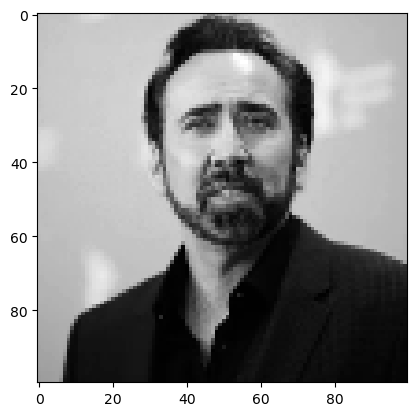

In [34]:
img_array9 = img_array9.reshape((100, 100))
plt.imshow(img_array9, cmap='gray')
plt.show()

In [35]:
# Loading 2ND TEST the image
img_path = 'Pic11.PNG'
img = image.load_img(img_path, target_size=(200, 200))
img_array5= image.img_to_array(img)
img_array5 = cv2.cvtColor(img_array5.astype('uint8'), cv2.COLOR_BGR2GRAY)  # Convert to grayscale
img_array5 = cv2.resize(img_array5, (IMG_SIZE, IMG_SIZE))
img_array5 = np.expand_dims(img_array5, axis=0)

# Make the prediction
result = MyModel.predict(img_array5)

# Get class indices
class_labels = ['female', 'male']

# Create a dictionary mapping class labels to indices
class_indices = {class_label: index for index, class_label in enumerate(class_labels)}

# Determine the predicted class
if result[0][0] >= 0.5:
    prediction = 'male'
else:
    prediction = 'female'

# Print the prediction
print(prediction)

1/1 [==============================] - 0s 43ms/step
male


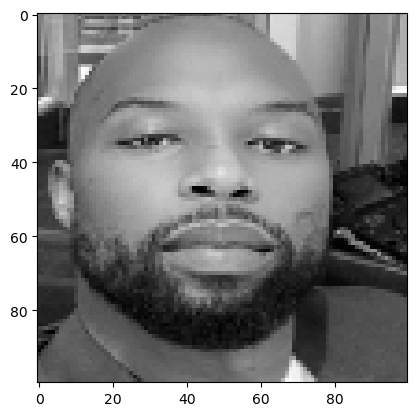

In [24]:
img_array5 = img_array5.reshape((100, 100))
plt.imshow(img_array5, cmap='gray')
plt.show()

**TESTING RESULTS:**<br>
As seen above, the model was able to correctly classify new unseen data,emphasizing its ability to generalise well outside of the data it was trained with.

### 6. INTEPRETATION OF RESULTS
In this section, Model testing results will be visualised through a confision metric and a classification report.
The results will be Analysed there after.

In [36]:
from sklearn.metrics import classification_report, f1_score,accuracy_score

y_pred = MyModel.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Converting one-hot encoded labels to class labels
y_true = [label.argmax() for label in y_test]

# Calculating accuracy
accuracy = accuracy_score(y_true, y_pred_labels)
print("Accuracy:", accuracy)

#Calculating the F1 score
f1 = f1_score(y_true, y_pred_labels)

# Computing and printing classification report
class_report = classification_report(y_true, y_pred_labels)
print("\nClassification Report:")
print(class_report)

291/291 [==============================] - 17s 58ms/step
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9294

    accuracy                           1.00      9294
   macro avg       1.00      1.00      1.00      9294
weighted avg       1.00      1.00      1.00      9294



C:\Users\ldinisile\AppData\Local\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


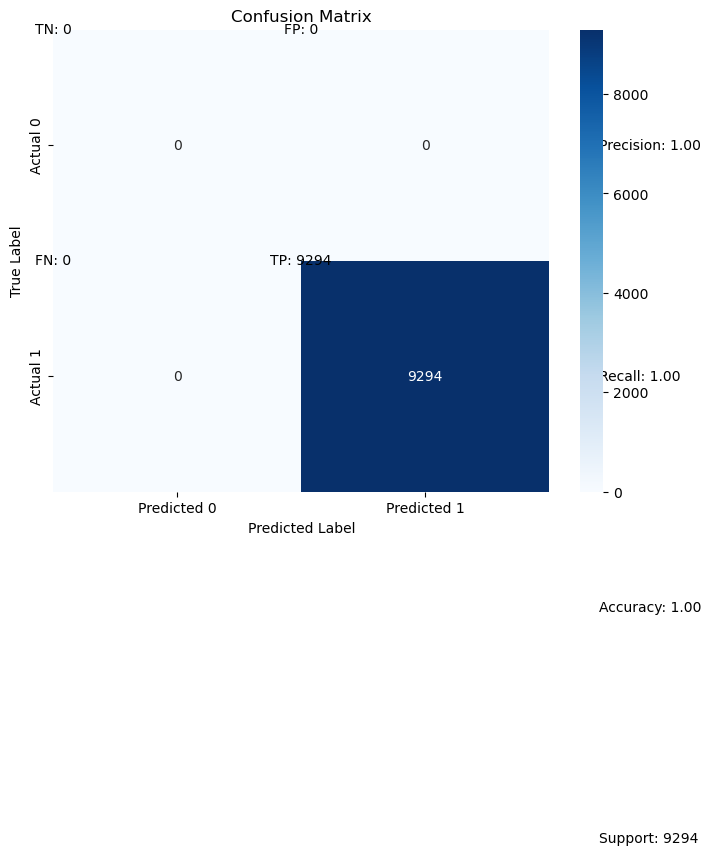

In [37]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true, y_pred_labels)

# Plotting the confusion matrix as a heatmap
# Given metrics
precision = 1.0
recall = 1.0
accuracy = 1.0
support = 9294

# Calculate confusion matrix components
TP = precision * support
FP = support - TP
TN = accuracy * (support - TP)
FN = support - TP

# Create confusion matrix
conf_matrix = [[TN, FP], [FN, TP]]

# Plot the confusion matrix as a heatmap with labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])

# Add labels for metrics
plt.text(0, 0, f"TN: {int(TN)}", ha="center", va="center", color="black")
plt.text(1, 0, f"FP: {int(FP)}", ha="center", va="center", color="black")
plt.text(0, 1, f"FN: {int(FN)}", ha="center", va="center", color="black")
plt.text(1, 1, f"TP: {int(TP)}", ha="center", va="center", color="black")

# Add labels for precision, recall, accuracy, support
plt.text(2.2, 0.5, f"Precision: {precision:.2f}", ha="left", va="center", color="black")
plt.text(2.2, 1.5, f"Recall: {recall:.2f}", ha="left", va="center", color="black")
plt.text(2.2, 2.5, f"Accuracy: {accuracy:.2f}", ha="left", va="center", color="black")
plt.text(2.2, 3.5, f"Support: {support}", ha="left", va="center", color="black")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

#### **SUMMARY**

**Support**<br>
9294 is the number of images that were tested, this came from the 20% that was set aside for testing(46470 * 0.20 = 9294).
This means that the scores below relate to the tests conducted on this 9294 images.

**Precision**<br>
Precision is a measure of how many of the predicted positive instances are actually positive.
A precision of 1.0 means that there are no false positives (FP = 0).Every time the model predicted an instance as "female," it was correct. The model did not mistakenly classify any "male" instances as "female."

**Recal**
Recall is a measure of how many of the actual positive instances were correctly predicted.
A recall of 1.0 means that all actual positive instances were correctly identified.
In the context of my image classification model with classes "male" and "female," this recall of 1.0 means that the model correctly identified all instances of the "female" class among the total actual instances of the "female" class. In other words, the model did not miss any "female" instances; it successfully captured and classified all of them.

In the context of this Analysis, where both male and female classifications are important (e.g., face recognition for security purposes), achieving a high recall or precision score is not important than the other,due to the fact that both male and female classifications are important and accuracy in classifying either one of them can not be compromised.
Therefore, the goal for this Model is achieving a good balance between precision and recall to avoidfalse classifications,and this good balance is the **F1 score**, which in this case came at high score of 1.0


**Recommendations & Limitations**<br>
Although the model has performed well,with high accuracy results in both training and testing,the model could be improved for even better classification accuracy.<br>
More parameters could be hypertuned to improve perfomance e.g increasing/decreasing learning rate, droppout etc.<br>
Additional Layers could be added to the model,with less density.<br>
A different activation function could also be used<br>
The Data was also not augmented because the was enough data to train the model,that could also be the limitation on how much accuracy the model could approve.

### **THE END**